In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import gc
gc.enable()

In [3]:
path ='../input/instacart-market-basket-analysis/'
# path ="../"

In [4]:
dtype = {
    "order_id": 'uint32',
    "user_id": 'uint32',
    "eval_set": 'category',
    "order_number": 'uint8',
    "order_dow": 'uint8',
    "order_hour_of_day": 'uint8',
    "days_since_prior_order": 'float16'
}
order = pd.read_csv(path+"orders.csv", dtype=dtype  )
order.head(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [5]:
dtype = {
    "order_id": 'uint32',
    "product_id": 'uint32',
    "add_to_cart_order": 'uint8',
    "reordered": 'uint8',

}

order_product_train = pd.read_csv(path+"order_products__train.csv" , dtype=dtype  )
order_product_train.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
dtype = {
    "order_id": 'uint32',
    "product_id": 'uint32',
    "add_to_cart_order": 'uint8',
    "reordered": 'uint8',

}

order_product_prior = pd.read_csv(path+"order_products__prior.csv"  , dtype=dtype )
order_product_prior.head(5)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
dtype = {
    "product_id": 'uint32',
    "product_name": 'category',
    "aisle_id": 'uint16',
    "department_id": 'uint16',

}

product = pd.read_csv(path+"products.csv", dtype=dtype  )
product.head(5)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [8]:
dtype = {

    "department_id": 'uint16',
    "department": 'category'

}

department = pd.read_csv(path+"departments.csv" , dtype=dtype )
department.head(5)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [9]:
dtype = {

    "aisle_id": 'uint16',
    "aisle": 'category'

}

aisles = pd.read_csv(path+"aisles.csv" , dtype=dtype)
aisles.head(5)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


## Lets look at the distribution of features in each table

# orders

#### There are 3421083 unique order id

In [10]:

len(order['order_id'].unique())

3421083

In [11]:
sns.set_theme(style="darkgrid")

**Distribution of eval_set**

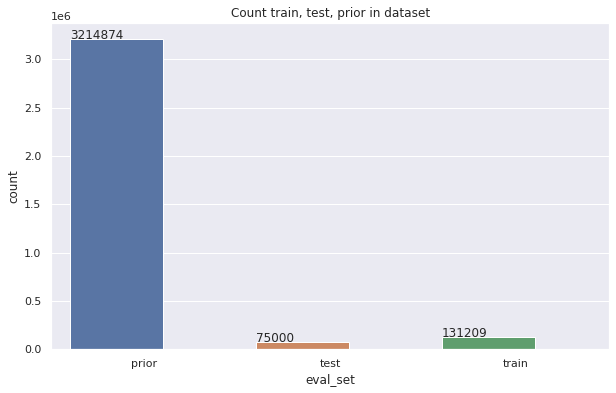

In [12]:
plt.figure(figsize=(10,6))
ax=sns.countplot(x='eval_set' ,data =order )
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
        p.set_width(0.5)
plt.title("Count train, test, prior in dataset")
plt.show()



- There is 3.2 millon prior order 
- 1.3 million train order
- 0.75 million test order
- Recent made order has been split into train and test.There is over 3 milloin prior orders, 131209 order in train and 75000 order in test.

**Distribution of order day of week**

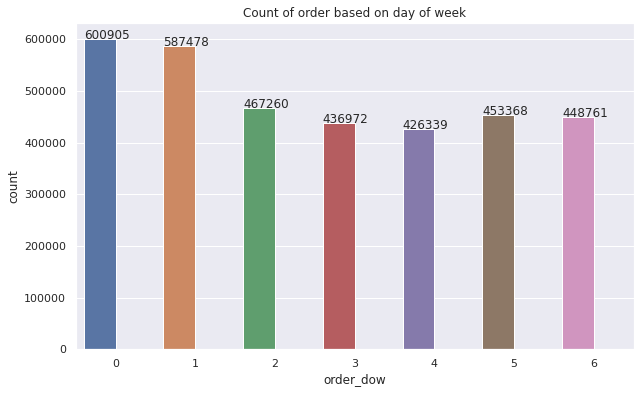

In [13]:

plt.figure(figsize=(10,6))
ax=sns.countplot(x='order_dow' ,data =order)
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
        p.set_width(0.4)
                
plt.title("Count of order based on day of week")
plt.show()

- People seem to order more on 0 saturday , 1 sunday. 
- Wednesday 4 has lest number of orders. 

**Distribution of order hour of day**

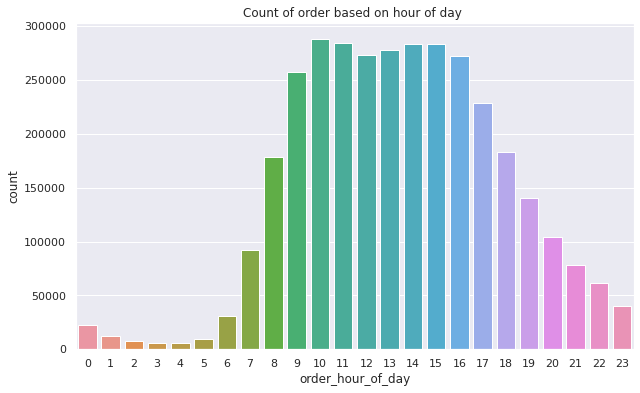

In [14]:

plt.figure(figsize=(10,6))
ax=sns.countplot(x='order_hour_of_day' ,data =order)                
plt.title("Count of order based on hour of day ")
plt.show()

- There is very few order very early part of 1-5 am people are probaly sleeping 
- From 8-11 am order spikes people are probaly ordering for morning needs
- There is second spike during later part of day people are probaly ordering for evening or night.
- Order count keeps reduces in later part of evening  

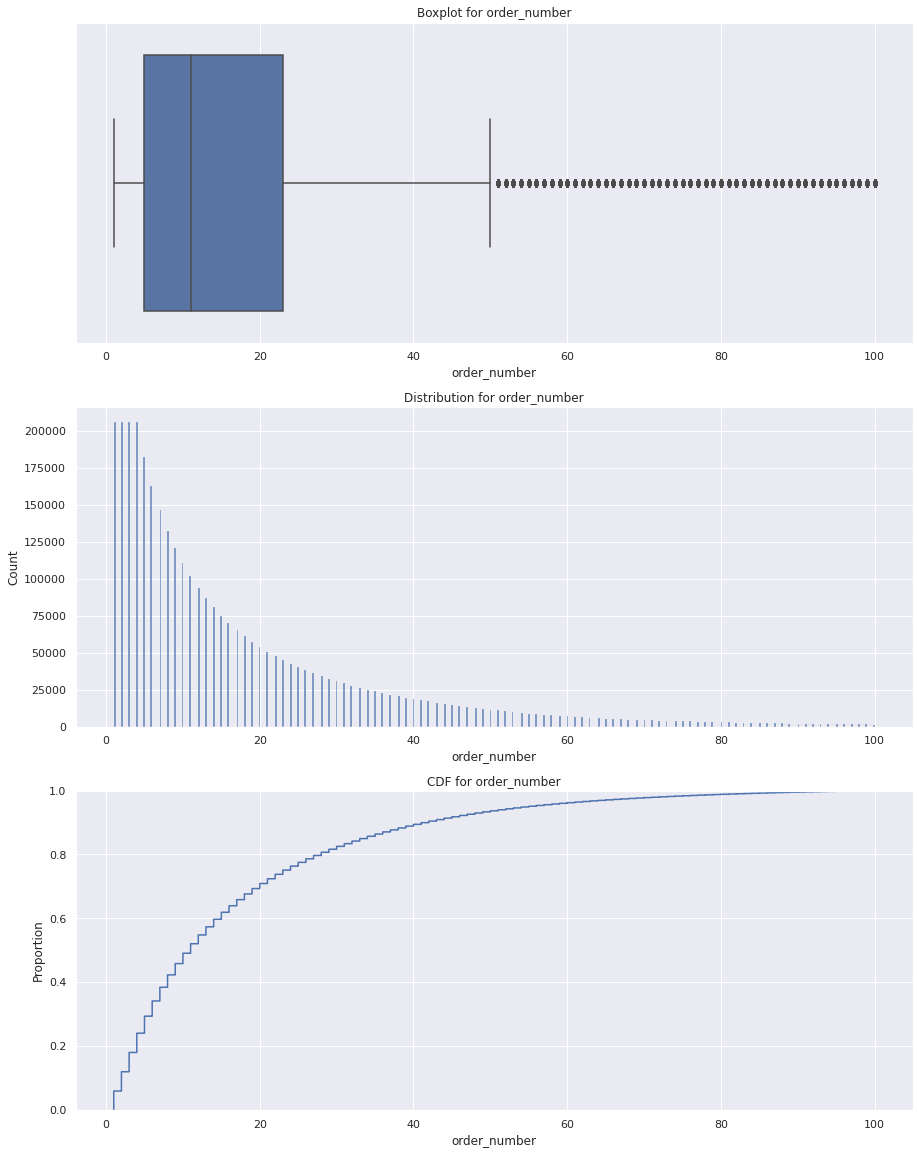

In [15]:
fig, axis =plt.subplots(3, 1, figsize=(15,20) )
sns.boxplot(ax=axis[0],x='order_number' ,data =order)                
axis[0].set_title("Boxplot for order_number")
sns.histplot(ax=axis[1],x='order_number' ,data =order)                
axis[1].set_title("Distribution for order_number")
sns.ecdfplot(ax =axis[2] ,x='order_number' ,data =order )                
axis[2].set_title("CDF for order_number")
plt.show()

- Order number range from 1-100,customer that has made anywhere from 1 to 100 orders
- 40% of user has less than 10 orders
- 50 % of user has less than 15 order
- 90% of people have made less than 50 orders
- People who has ordered more than 50 orders are rare 

**Distribution of days_since_prior_order**

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


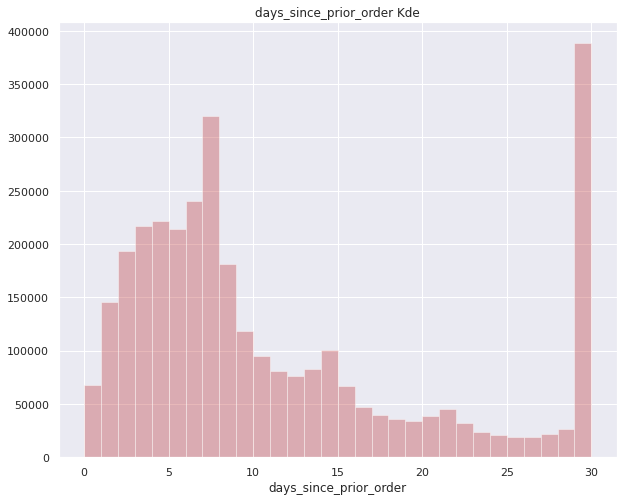

In [16]:
plt.figure(figsize=(10,8))
ax=sns.distplot(a=order['days_since_prior_order'],bins=30 ,kde=False ,color="r")                
plt.title("days_since_prior_order Kde")
plt.show()

- After 7 day there is spike in order, people may be restocking their weekly needs
- Second spike can be seem on 14 , 21 day
- After every 7 day there spike in order 
- Day 30 we see a huge spike that may be because  day since proir order is ranged till 30 so all the order 
  made before 30 days are put into one bin.

# order_product_train

**Percentage of reorder in train set**

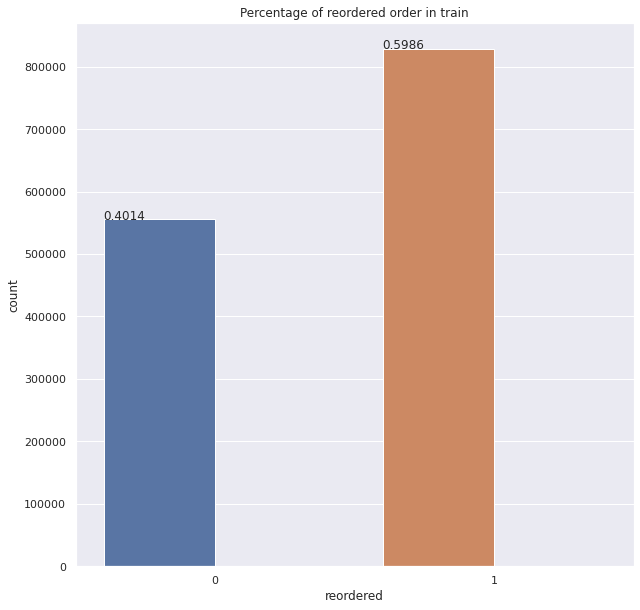

In [17]:
plt.figure(figsize=(10,10) )
ax=sns.countplot(data = order_product_train,x ='reordered' )
for p in ax.patches:
        ax.annotate("{:2.4f}".format(p.get_height()/order_product_train.shape[0]), (p.get_x(), p.get_height()))
        p.set_width(0.4)
plt.title("Percentage of reordered order in train")
plt.show()

- About 60% of order are reordered in order train
- About 40% of order are not reordered in order train

**Lets try to find what percentage of order in train where reorderd again**

In [18]:
order_product_train['reordered'].unique()

array([1, 0], dtype=uint8)

In [19]:
group_by_order = order_product_train.groupby("order_id")["reordered"].aggregate("sum").reset_index()
group_by_order['reordered'] =np.where(group_by_order['reordered'] >=1 ,1 ,0)
per=group_by_order['reordered'].sum()/group_by_order['reordered'].shape[0]
print("{:2.4f}% of order in train has been reorderd where for {:2.4f}% there was no reorder made".format(per*100 , 100-(per*100)))

93.4440% of order in train has been reorderd where for 6.5560% there was no reorder made


**Lets try to find how many products people buy in a order in train set**

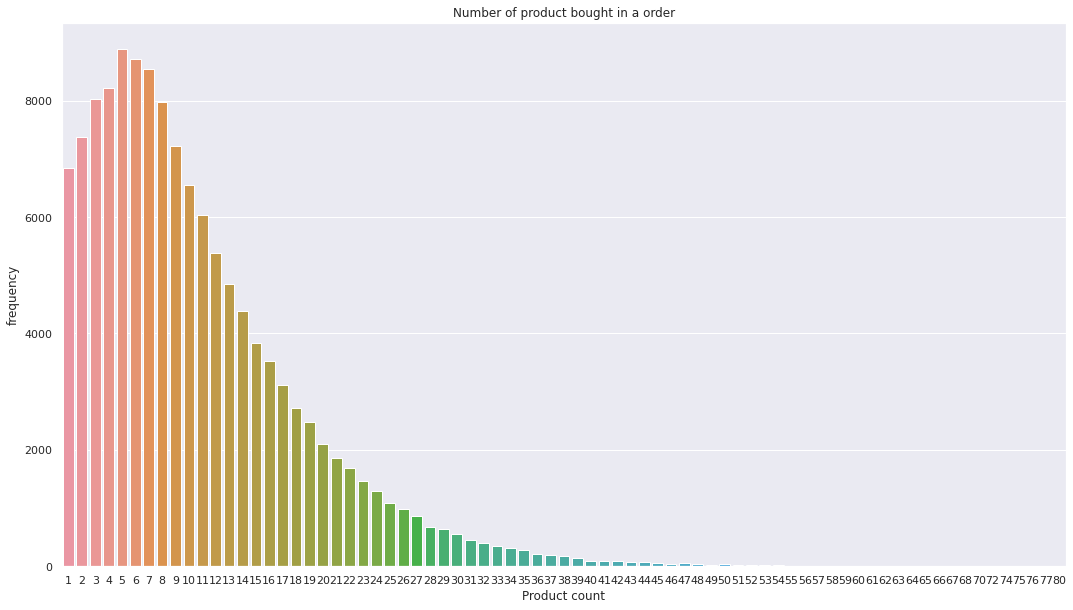

In [20]:

order_max=order_product_train.groupby(['order_id' ])['add_to_cart_order'].agg('max').reset_index()
cart_order_count=order_max['add_to_cart_order'].value_counts()
plt.figure(figsize=(18,10))
sns.barplot(x=cart_order_count.index,y=cart_order_count)
plt.title("Number of product bought in a order")
plt.xlabel("Product count")
plt.ylabel("frequency")
plt.show()

- Most order contains 5 product 
- Majority of order contains beetween 1-10 products
- very few people order more than 30 poduct in one go

# order_product_prior

**Percentage of reorder in prior set**

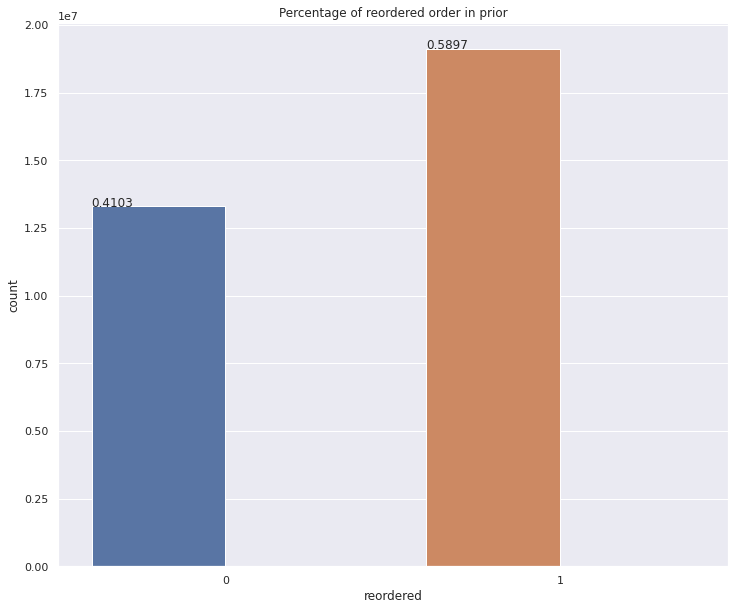

In [21]:

plt.figure(figsize=(12,10))
ax=sns.countplot(data = order_product_prior , x ='reordered' )
for p in ax.patches:
        ax.annotate("{:2.4f}".format(p.get_height()/order_product_prior.shape[0]), (p.get_x(), p.get_height()))
        p.set_width(0.4)
plt.title("Percentage of reordered order in prior")
plt.show()

- About 59 % of order are reordered in order tain
- About 41 % of order are not reordered in order tain

**Lets try to find how many products people buy in a order in prior set**

In [22]:
group_by_order = order_product_prior.groupby("order_id")["reordered"].aggregate("sum").reset_index()
group_by_order['reordered'] =np.where(group_by_order['reordered'] >=1 ,1 ,0)
per=group_by_order['reordered'].sum()/group_by_order['reordered'].shape[0]
print("{:2.4f}% of order in prior has been reordered where for {:2.4f}% there was no reorder made".format(per*100 , 100-(per*100)))

87.9151% of order in prior has been reordered where for 12.0849% there was no reorder made


# Product 

In [23]:
product_len=len(product['product_id'].unique())
print("Total there are {} products".format(product_len))

Total there are 49688 products


# Deperatment

In [24]:
department_len=len(department['department_id'].unique())
print("Total there are {} departments".format(department_len))

Total there are 21 departments


# aisles

In [25]:
aisles_len=len(aisles['aisle_id'].unique())
print("Total there are {} aisles".format(aisles_len))

Total there are 134 aisles


### Lets concat train and prior set then merge product aisle and department table
1. Concat order prior and train
2. Merge order_product_cat to product table on product_id
3. Merge order_product_cat to aisles table on aisle_id
4. Merge order_product_cat to department table on department_id

In [26]:
order_product_cat = pd.concat([order_product_prior,order_product_train])
print(order_product_cat.shape)
order_product_cat.head()

(33819106, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [27]:
order_product_cat = pd.merge(order_product_cat , product , on ='product_id' , how='left')
order_product_cat.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2,33120,1,1,Organic Egg Whites,86,16
1,2,28985,2,1,Michigan Organic Kale,83,4
2,2,9327,3,0,Garlic Powder,104,13
3,2,45918,4,1,Coconut Butter,19,13
4,2,30035,5,0,Natural Sweetener,17,13


In [28]:
order_product_cat = pd.merge(order_product_cat , aisles , on ='aisle_id' , how='left')
order_product_cat.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients


In [29]:
order_product_cat = pd.merge(order_product_cat , department , on ='department_id' , how='left')
order_product_cat.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [30]:
order_product_cat.shape

(33819106, 9)

In [31]:
del department
del product
del aisles
del order_product_prior
del order_product_train

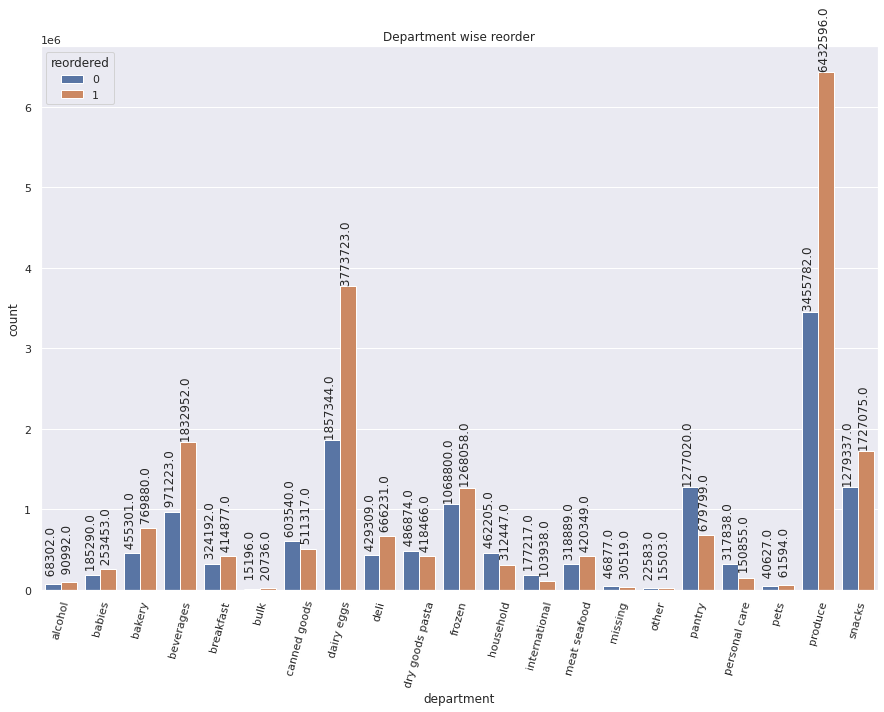

In [32]:

plt.figure(figsize=(15 ,10))
ax=sns.countplot(data=order_product_cat , x='department' , hue='reordered' )
for p in ax.patches:
        ax.annotate("{:10.1f}".format(p.get_height()), (p.get_x(), p.get_height()) ,rotation =90)
        p.set_width(0.4)
plt.xticks(rotation=75)       
plt.title("Department wise reorder")
plt.show()

- Produce has highest number of reorder followed by eggs,people seem to reorder daily consumable and fresh food more
- People like to reorder snacks, beverages , frozen a lot


In [33]:


def plot_reorder_ratio(group_by , target , xlab , ylab , title):
    """
    title =title of plot 
    ylab = y axis label
    xlab = x asix label
    group_by = groupby key
    target = target var to agg on 
    
    """
    reorder_ratio=order_product_cat.groupby(group_by)[target].agg('mean').reset_index()
    reorder_ratio=reorder_ratio.sort_values(by=target ,ascending=False).head(20).copy()
    plt.figure(figsize=(15 ,10))
    ax=plt.plot(reorder_ratio[group_by].values ,reorder_ratio[target].values)

    plt.xticks(rotation=75)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()

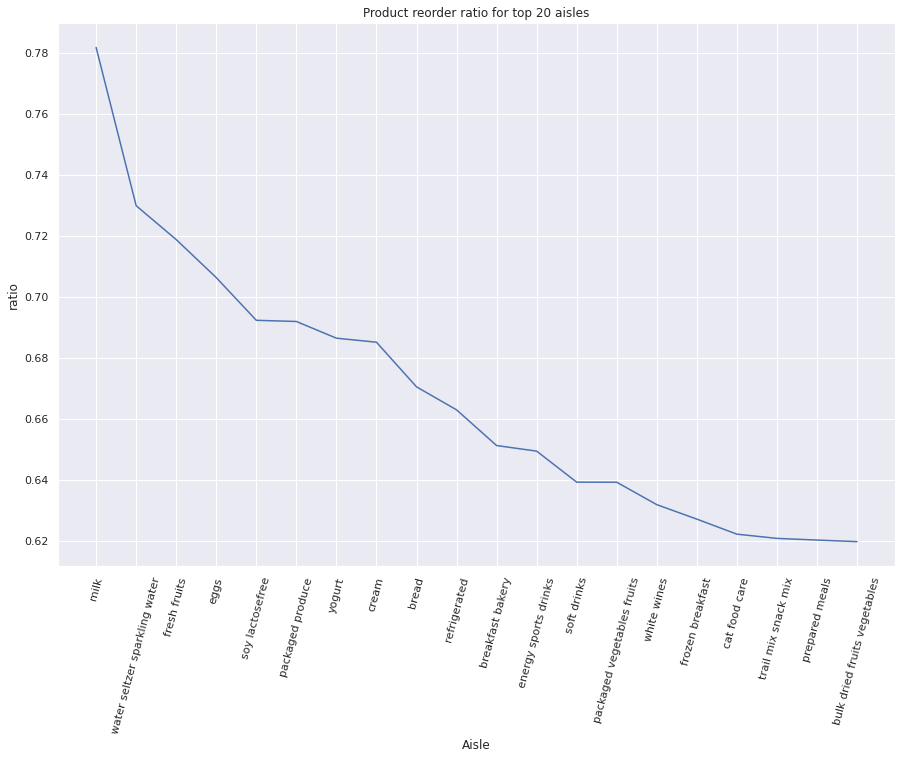

In [34]:
title ="Product reorder ratio for top 20 aisles"
ylab ="ratio"
xlab = "Aisle"
group_by ="aisle"
target ="reordered"




plot_reorder_ratio(group_by , target , xlab , ylab , title)

- Milk aisle has high reorder ratio followed by water and fresh fruit 
- fresh food, snacks energy drinks vegetables wine , quick meal aisles has high reorder ratio 

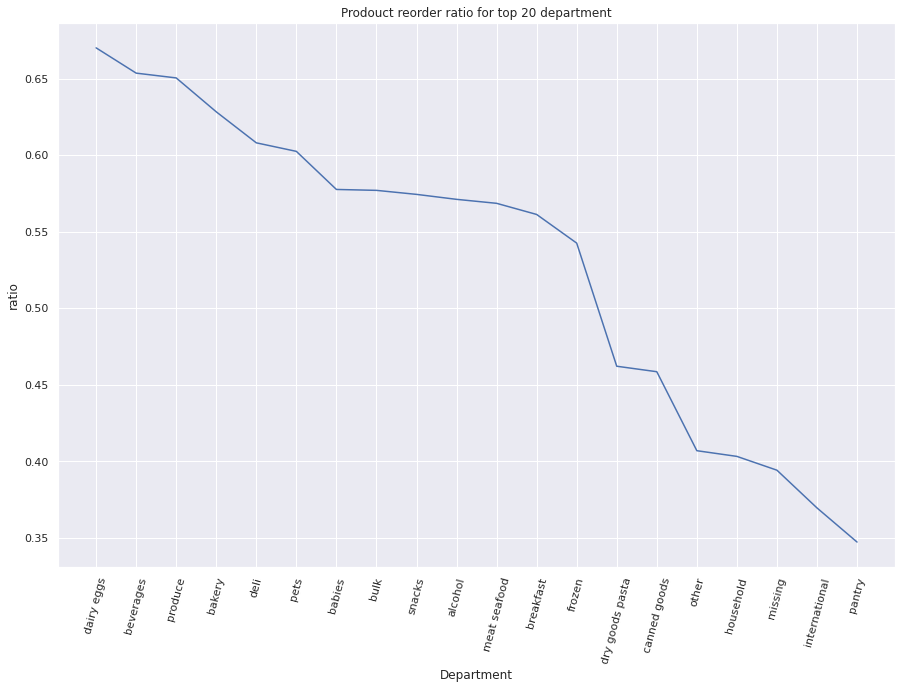

In [35]:
title ="Prodouct reorder ratio for top 20 department"
ylab ="ratio"
xlab = "Department"
group_by ="department"
target ="reordered"



plot_reorder_ratio(group_by , target , xlab , ylab , title)

- Dairy and egg departments seems to have high reorder ratio
- Fresh items food, beverages  department seems to have reordered quite often

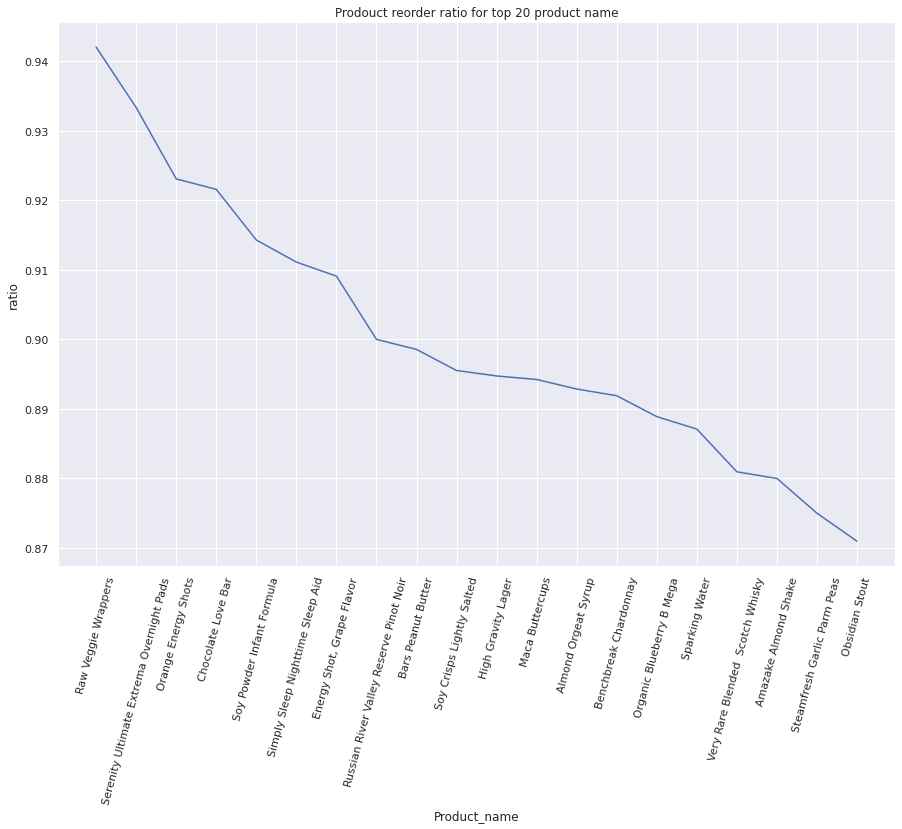

In [36]:
title ="Prodouct reorder ratio for top 20 product name"
ylab ="ratio"
xlab = "Product_name"
groupby ="product_name"
target ="reordered"

plot_reorder_ratio(groupby , target , xlab , ylab , title)

- Raw veggies wrapper has highiest number of reorder about 94% this some kind of veggie roll.
- Adult diaper,sleep pills have high reorder rate
- Energy drinks chocolates , water , chips , beer seem to have high reorder ratio. 

**Lets try to find count of reorder per in aisles**

In [37]:
aisle_reorder=pd.pivot_table(order_product_cat[['aisle' ,'reordered']] ,index =['aisle'] ,aggfunc='count' ).reset_index()
aisle_reorder=aisle_reorder.sort_values(by ='reordered' ,ascending=False).reset_index(drop=True)
print(aisle_reorder.head())
print("***********************")
print(aisle_reorder.tail())

                        aisle  reordered
0                fresh fruits    3792661
1            fresh vegetables    3568630
2  packaged vegetables fruits    1843806
3                      yogurt    1507583
4             packaged cheese    1021462
***********************
                   aisle  reordered
129         eye ear care       9522
130  baby bath body care       8909
131     baby accessories       8466
132               beauty       6455
133         frozen juice       5147


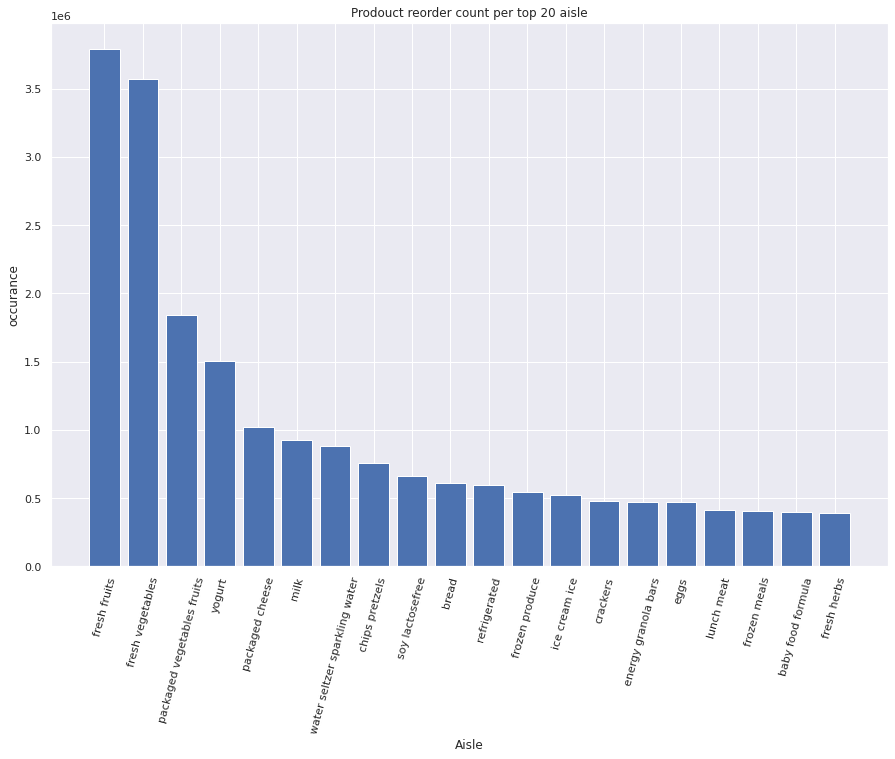

In [38]:

plt.figure(figsize=(15 ,10))
ax=plt.bar(aisle_reorder['aisle'].head(20) ,aisle_reorder['reordered'].head(20))

plt.xlabel("Aisle")
plt.ylabel("occurance")
plt.title("Prodouct reorder count per top 20 aisle")
plt.xticks(rotation=75)
plt.show()
del aisle_reorder

- Fresh fruit aisle has highest number of reorder
- Frozen juice aisle has least number of reorder

**Lets try to find count of reorder per in department**

In [39]:
department_reorder=pd.pivot_table(order_product_cat[['department' ,'reordered']] ,index =['department'] ,aggfunc='count').reset_index()
department_reorder=department_reorder.sort_values(by ='reordered' ,ascending=False).reset_index(drop=True)
print(department_reorder.head())
print("***********************")
print(department_reorder.tail())

   department  reordered
0     produce    9888378
1  dairy eggs    5631067
2      snacks    3006412
3   beverages    2804175
4      frozen    2336858
***********************
   department  reordered
16    alcohol     159294
17       pets     102221
18    missing      77396
19      other      38086
20       bulk      35932


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


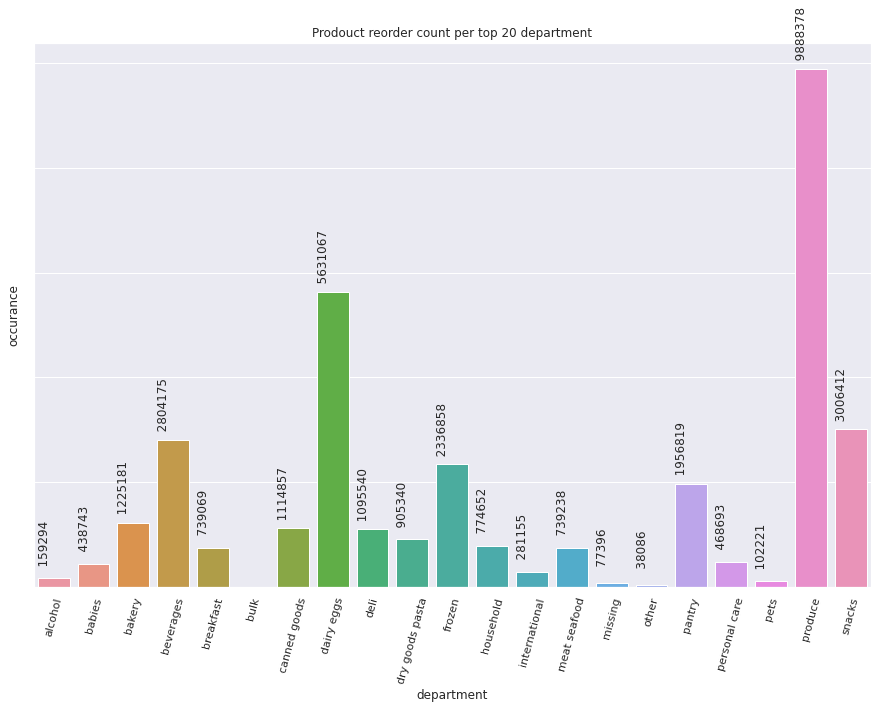

In [40]:
plt.figure(figsize=(15 ,10))
ax=sns.barplot(department_reorder['department'].head(20) ,department_reorder['reordered'].head(20))
for p in ax.patches:
        ax.annotate("{:10.0f}".format(p.get_height()), (p.get_x(), p.get_height()) ,rotation =90)
plt.xticks(rotation=75)
plt.xlabel("department")
plt.ylabel("occurance")
plt.title("Prodouct reorder count per top 20 department")
ax.set_yticklabels([])
plt.show()
del department_reorder

- Produce department has highest number of reorder
- Bulk department least number of reorder - may be because most people dont bulk order

**Lets try to find count of reorder product wise**

In [41]:
product_name_reorder=pd.pivot_table(order_product_cat[['product_name' ,'reordered']] ,index =['product_name'] ,aggfunc='count').reset_index()
product_name_reorder=product_name_reorder.sort_values(by ='reordered' ,ascending=False).reset_index(drop=True)
print(product_name_reorder.head())
print("***********************************")
print(product_name_reorder.tail())

             product_name  reordered
0                  Banana     491291
1  Bag of Organic Bananas     394930
2    Organic Strawberries     275577
3    Organic Baby Spinach     251705
4    Organic Hass Avocado     220877
***********************************
                                          product_name  reordered
49683                                    Brut Prosecco          1
49684           7.04 Oz. Grahamfuls Banana Vanilla 8ct          1
49685           Unpeeled Apricot Halves in Heavy Syrup          0
49686                      Protein Granola Apple Crisp          0
49687  Single Barrel Kentucky Straight Bourbon Whiskey          0


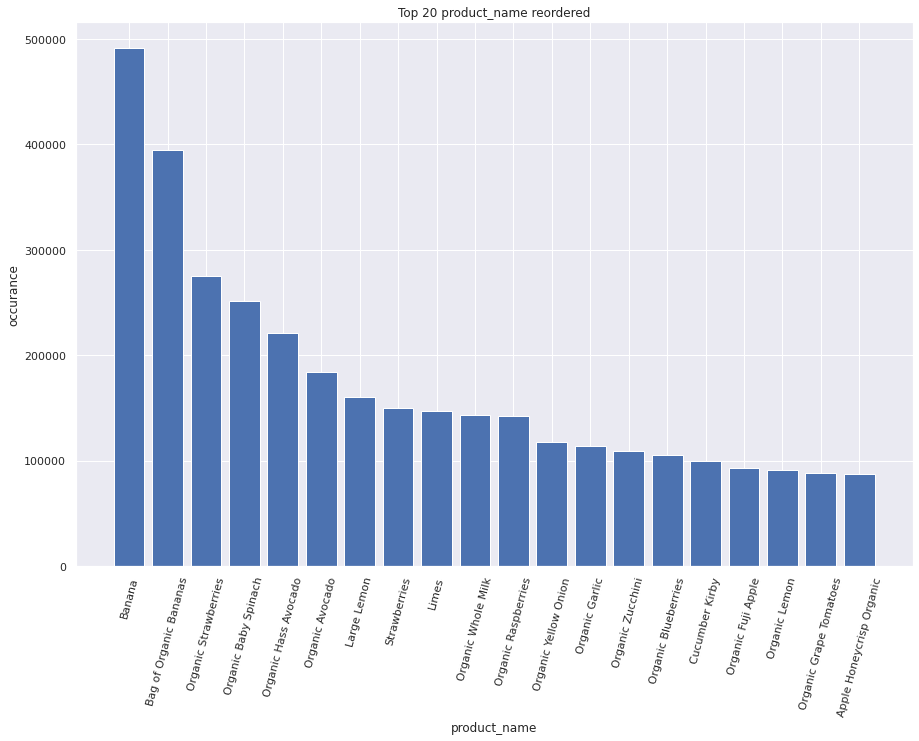

In [42]:
plt.figure(figsize=(15 ,10))
plt.bar(product_name_reorder['product_name'].head(20) ,product_name_reorder['reordered'].head(20))

plt.xticks(rotation=75)
plt.xlabel("product_name")
plt.ylabel("occurance")
plt.title("Top 20 product_name reordered")
ax.set_yticklabels([])
plt.show()

del product_name_reorder

- Banana has highest number of reorder followed by bag of organic banana
- Most of the top twenty items contains fresh fruits and veggies

**Lets try to find add to cart effect reorder ratio**

In [43]:
print("50 and 99.9 percentile of add_to_cart_order ",np.percentile(order_product_cat[['add_to_cart_order']] , [50 , 99.9]))

50 and 99.9 percentile of add_to_cart_order  [ 6. 49.]


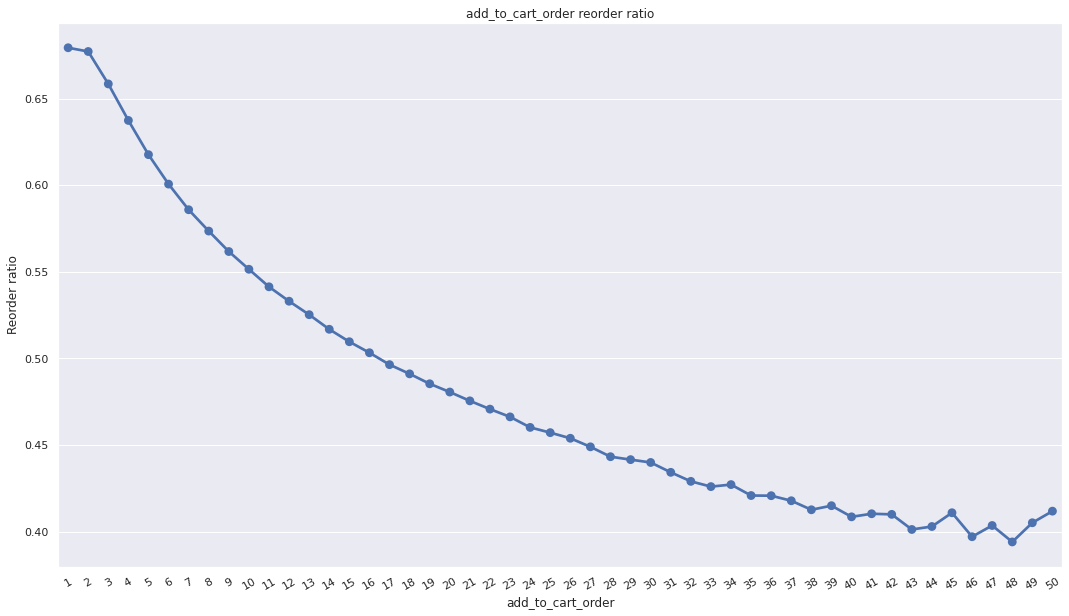

In [44]:


cart_reorder=order_product_cat[['add_to_cart_order','reordered']].copy()
cart_reorder.add_to_cart_order[cart_reorder.add_to_cart_order>50]=50

reorder_ratio=cart_reorder.groupby("add_to_cart_order")["reordered"].agg('mean').reset_index()
reorder_ratio=reorder_ratio.sort_values(by='reordered' ,ascending=False)
plt.figure(figsize=(18 ,10))
ax=sns.pointplot(x=reorder_ratio["add_to_cart_order"] ,y=reorder_ratio["reordered"])

plt.xticks(rotation=30)
plt.xlabel("add_to_cart_order")
plt.ylabel("Reorder ratio")
plt.title("add_to_cart_order reorder ratio")
plt.show()
del cart_reorder

- Since 99.9 of order have less than 49 product ordered we will mark all product above 50 as 50 
- Item added first in cart has higher chance of been reodered 
- Reordered ratio gradually decreases as add_to_cart_order count increases 

# Merging order_product_cat with order table

In [45]:
order_product_cat

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...
33819101,3421063,14233,3,1,Natural Artesian Water,115,7,water seltzer sparkling water,beverages
33819102,3421063,35548,4,1,Twice Baked Potatoes,13,20,prepared meals,deli
33819103,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
33819104,3421070,16953,2,1,Creamy Peanut Butter,88,13,spreads,pantry


In [46]:
order_product_prior_=pd.merge(order_product_cat, order,  on ='order_id' , how='left')
del order_product_cat

In [47]:
order_product_prior_.head(5)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


**Let try to find how day of week effect reorder ratio**

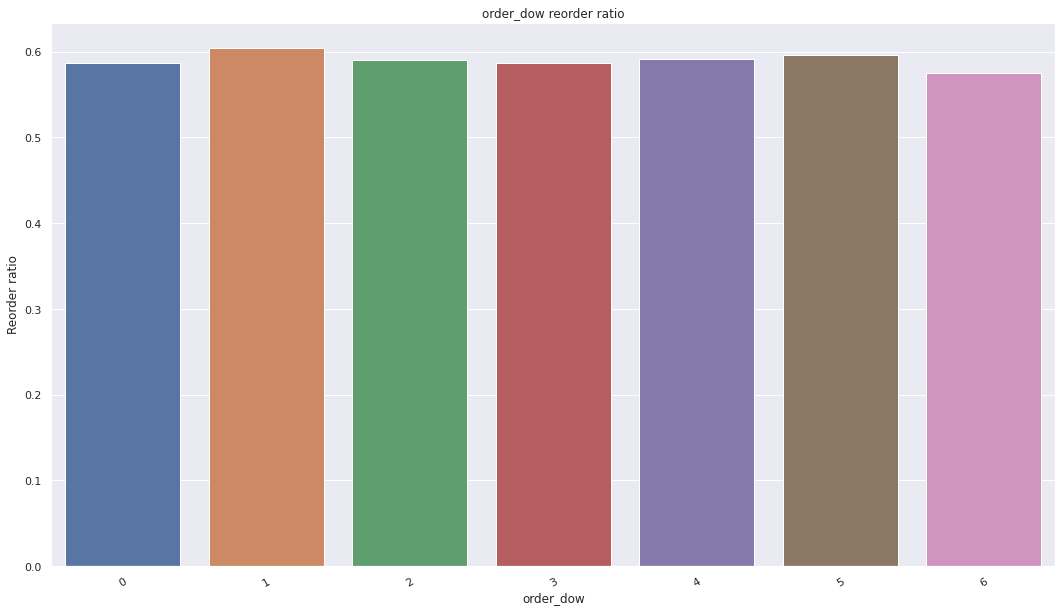

In [48]:
reorder_ratio=order_product_prior_.groupby("order_dow")["reordered"].agg('mean').reset_index()
reorder_ratio=reorder_ratio.sort_values(by='reordered' ,ascending=False)
plt.figure(figsize=(18 ,10))
ax=sns.barplot(x=reorder_ratio["order_dow"] ,y=reorder_ratio["reordered"])

plt.xticks(rotation=30)
plt.xlabel("order_dow")
plt.ylabel("Reorder ratio")
plt.title("order_dow reorder ratio")
plt.show()

- Reorder has no significant effect on day of week
- Sunday and Thrusday reorder seem to be highier

**Let try to find how hour of day  effect reorder ratio**

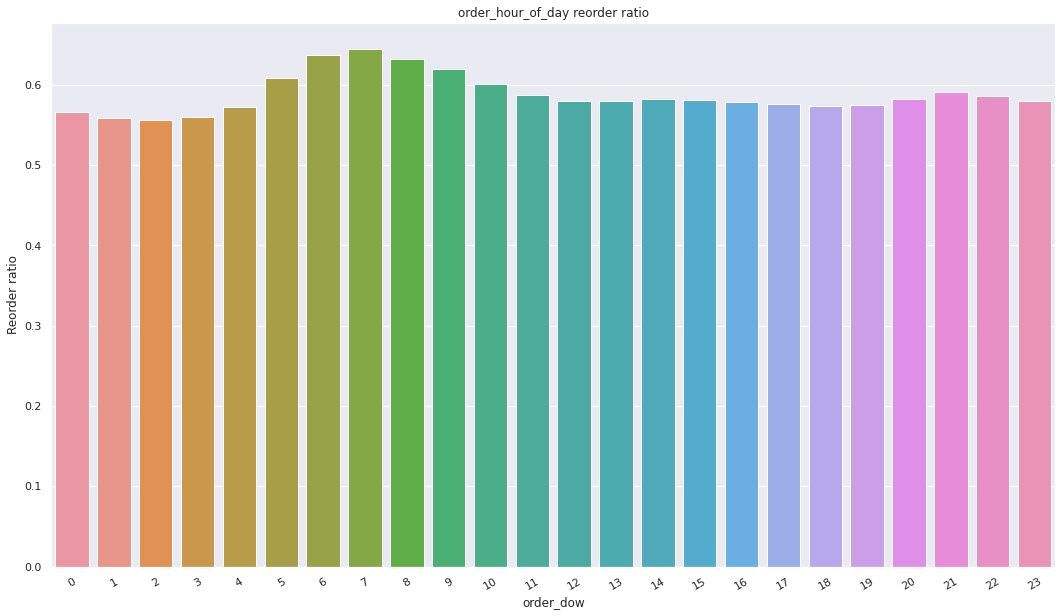

In [49]:
reorder_ratio=order_product_prior_.groupby("order_hour_of_day")["reordered"].agg('mean').reset_index()
reorder_ratio=reorder_ratio.sort_values(by='reordered' ,ascending=False)
plt.figure(figsize=(18 ,10))
ax=sns.barplot(x=reorder_ratio["order_hour_of_day"] ,y=reorder_ratio["reordered"])

plt.xticks(rotation=30)
plt.xlabel("order_dow")
plt.ylabel("Reorder ratio")
plt.title("order_hour_of_day reorder ratio")
plt.show()

- On early part of the day reorder seems to highier people seem to order for their daily needs
- From 6 to 10 there is significantly high reorder
- During night there seem to be high reorder compared to day time, people seem to order for their morning needs

**Let try to find how day of week and hour if week effect reorder ratio**

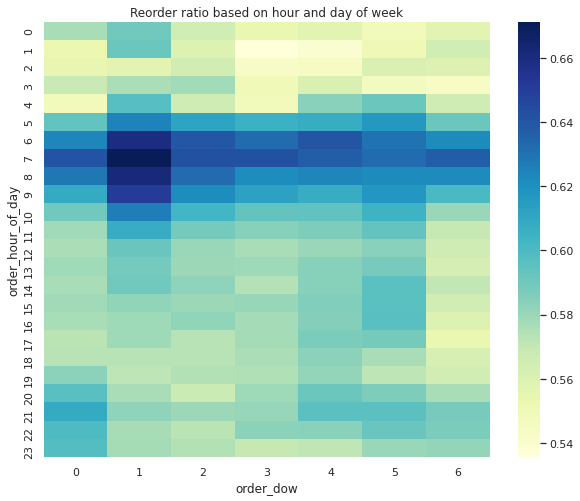

In [50]:
reorder_ratio=order_product_prior_.groupby(["order_dow","order_hour_of_day" ])["reordered"].agg('mean').reset_index()
reorder_ratio_pivot =pd.pivot(data=reorder_ratio , index ="order_hour_of_day" , columns="order_dow" ,values="reordered" )
plt.figure(figsize=(10,8))
sns.heatmap(reorder_ratio_pivot ,cmap="YlGnBu" )
plt.title("Reorder ratio based on hour and day of week")
plt.show()

- We can see that during early hour of day between 5 -10 most reorder are made 
- Sunday early hour between 5 -10  has highiest reorder
- Saturday night people order considerbely more than any week day

In [51]:
numerical_feature =['add_to_cart_order' ,'order_number' ,'order_dow' ,'order_hour_of_day','days_since_prior_order','reordered']
categorical_feature =['product_name','aisle' ,'department','order_id','product_id','aisle_id','department_id' ,'user_id']

In [52]:
order_product_prior_.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0


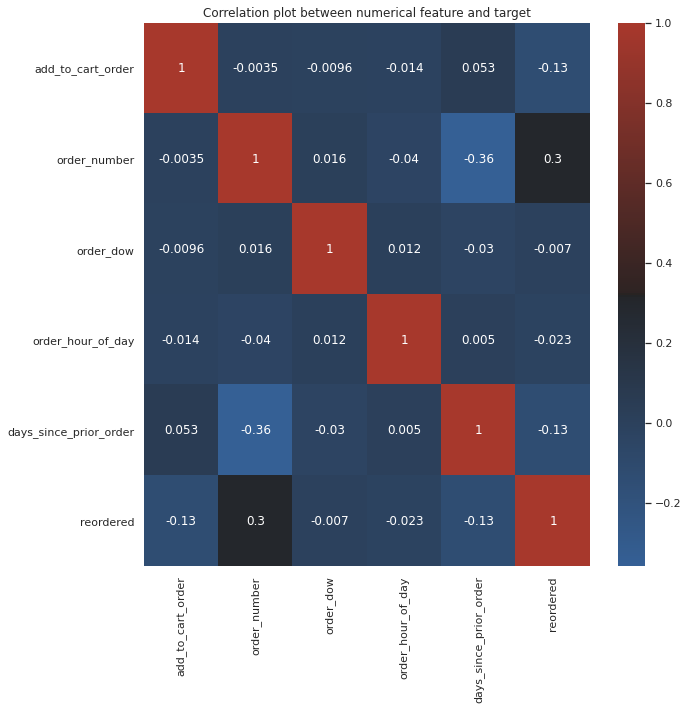

In [53]:
num_corr=order_product_prior_[numerical_feature].corr()
plt.figure(figsize=(10,10))
sns.heatmap(num_corr ,cmap =sns.diverging_palette(250, 15, s=75, l=40,
                                  n=9, center="dark", as_cmap=True),annot=True )
plt.title("Correlation plot between numerical feature and target")
plt.show()

- Order_number is silghtly positively correlated with reorder , people who tends to order more also tends to reorder more 
- add_to_cart_order slightly negitively correlated with reorder, as add_to cart_order increases probality of reorder decreases , product added initially has higher chances of being reordered. 
- days_since_prior_order is  slightly negitively correlated with reorder , as days_since_prior_order tell from last how many days customer havent reordered,if days_since_prior_order increases probality of reorder decreases.
- day of week and hour are very slightly negetively correlated with reordered they do not influence reordered much.




